(testing_xarray:exercise)=
# Using xarray

Before we get started, we test the learning environment and the most important packages needed to run the notebooks. This is not so much a continuous coherent exercise as individual examples based on the different packages.This exercise is neither an introduction to Python nor extensive tutorials for the individual packages. I advise you, if you have little or no experience with the packages, to work through the relevant tutorial on the websites. All packages offer very good and extensive tutorials. Most of the functions presented here have been taken from these websites.

<div class="alert alert-block alert-success">
<b>Learning objectives:</b><br>
<ul>
 <li>Getting to know the learning environment</li>
 <li>Testing the xarray packages</li>
 <li>Very brief overview of the function of the package</li>
</ul>  
</div>

<div class="alert alert-block alert-info">
<b>How to proceed:</b><br>
<ul>
 <li>Testing xarray</li>
</ul>  
</div>

# Getting started


Multi-dimensional (a.k.a. N-dimensional, ND) arrays (sometimes called “tensors”) are an essential part of computational science. They are encountered in a wide range of fields, including physics, astronomy, geoscience, bioinformatics, engineering, finance, and deep learning. In Python, NumPy provides the fundamental data structure and API for working with raw ND arrays. However, real-world datasets are usually more than just raw numbers; they have labels which encode information about how the array values map to locations in space, time, etc.

Xarray provides a powerful and concise interface for multi-dimensional arrays (see [webpage](https://docs.xarray.dev/en/stable/index.html)). Here are some quick example of what you can do with xarray


To begin, import numpy, pandas and xarray using their customary abbreviations:

In [34]:
# Import packages
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

Xarray has two core data structures, which build upon and extend the core strengths of NumPy and pandas. Both data structures are fundamentally N-dimensional:

<ul>
<li>DataArray is our implementation of a labeled, N-dimensional array. It is an N-D generalization of a pandas.Series. 
<li>Dataset is a multi-dimensional, in-memory array database. It is a dict-like container of DataArray objects aligned along any number of shared dimensions, and serves a similar purpose in xarray to the pandas.DataFrame.
</ul>

In climate science we often use the NetCDF file format. You can directly read and write xarray objects to disk using to_netcdf(), open_dataset() and open_dataarray(). Suppose you have a netCDF of monthly mean data and we want to calculate the seasonal average. To do this properly, we need to calculate the weighted average considering that each month has a different number of days.

First, open the dataset

In [21]:
# Load a netcdf dataset with xarray
ds = xr.open_dataset("data/ear5_monthly_europe.nc")

and let's have a look to the dataset structure

In [22]:
ds

<xarray.Dataset>
Dimensions:                  (time: 36, lat: 181, lon: 269)
Coordinates:
    realization              int64 ...
  * time                     (time) datetime64[ns] 2020-01-01 ... 2022-12-01
  * lat                      (lat) float64 27.0 27.25 27.5 ... 71.5 71.75 72.0
  * lon                      (lon) float64 -22.0 -21.75 -21.5 ... 44.75 45.0
    experimentVersionNumber  (time) object ...
Data variables:
    u10                      (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.7
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      2023-04-15T09:35 GRIB to CDM+CF via cfgrib-0.9.9.1/ecCodes-...
    source:       ECMWF

The dataset contains one data variable skt which has three coordinates: time, lat, and lon. We can access the coordinates very easily with

In [23]:
# Access the time coordinates
ds.time

<xarray.DataArray 'time' (time: 36)>
array(['2020-01-01T00:00:00.000000000', '2020-02-01T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000', '2020-04-01T00:00:00.000000000',
       '2020-05-01T00:00:00.000000000', '2020-06-01T00:00:00.000000000',
       '2020-07-01T00:00:00.000000000', '2020-08-01T00:00:00.000000000',
       '2020-09-01T00:00:00.000000000', '2020-10-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000',
       '2021-01-01T00:00:00.000000000', '2021-02-01T00:00:00.000000000',
       '2021-03-01T00:00:00.000000000', '2021-04-01T00:00:00.000000000',
       '2021-05-01T00:00:00.000000000', '2021-06-01T00:00:00.000000000',
       '2021-07-01T00:00:00.000000000', '2021-08-01T00:00:00.000000000',
       '2021-09-01T00:00:00.000000000', '2021-10-01T00:00:00.000000000',
       '2021-11-01T00:00:00.000000000', '2021-12-01T00:00:00.000000000',
       '2022-01-01T00:00:00.000000000', '2022-02-01T00:00:00.000000000',
       '2022-03-01T00:00:00.000000000', '2022-04-01T00:00:00.000000000',
       '2022-05-01T00:00:00.000000000', '2022-06-01T00:00:00.000000000',
       '2022-07-01T00:00:00.000000000', '2022-08-01T00:00:00.000000000',
       '2022-09-01T00:00:00.000000000', '2022-10-01T00:00:00.000000000',
       '2022-11-01T00:00:00.000000000', '2022-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    realization              int64 0
  * time                     (time) datetime64[ns] 2020-01-01 ... 2022-12-01
    experimentVersionNumber  (time) object '0001' '0001' ... '0001' '0001'
Attributes:
    long_name:         time
    standard_name:     time
    axis:              T
    stored_direction:  increasing
    type:              double

We can quickly visualise the variable for a single month with

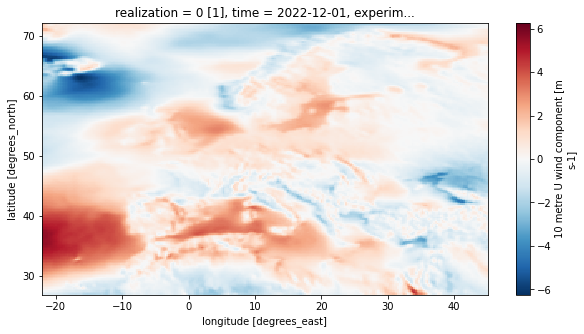

In [25]:
# Here we plot the temperature for december 2022
ds["u10"].sel(time='2022-12-01').plot(figsize=(10,5))

Suppose we want to calculate the seasonal average. To do this properly, we need to calculate the weighted average considering that each month has a different number of days.

We first have to come up with the weights - calculate the month length for each monthly data record 

In [26]:
# Get the length of each monthly data record
month_length = ds.time.dt.days_in_month

# Plot the result
month_length

<xarray.DataArray 'days_in_month' (time: 36)>
array([31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31,
       30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31,
       30, 31])
Coordinates:
    realization              int64 0
  * time                     (time) datetime64[ns] 2020-01-01 ... 2022-12-01
    experimentVersionNumber  (time) object '0001' '0001' ... '0001' '0001'

Then we calculate the weights using groupby('time.season')

In [30]:
# Calculate the weights by grouping by 'time.season'.
weights = (
    month_length.groupby("time.season") / month_length.groupby("time.season").sum()
)

# Test that the sum of the weights for each season is 1.0
np.testing.assert_allclose(weights.groupby("time.season").sum().values, np.ones(4))

Finally, we can weight the months and sum the result

In [31]:
# Calculate the weighted average
ds_weighted = (ds * weights).groupby("time.season").sum(dim="time")

Text(0.5, 1.02, 'Seasonal Surface Air Temperature')

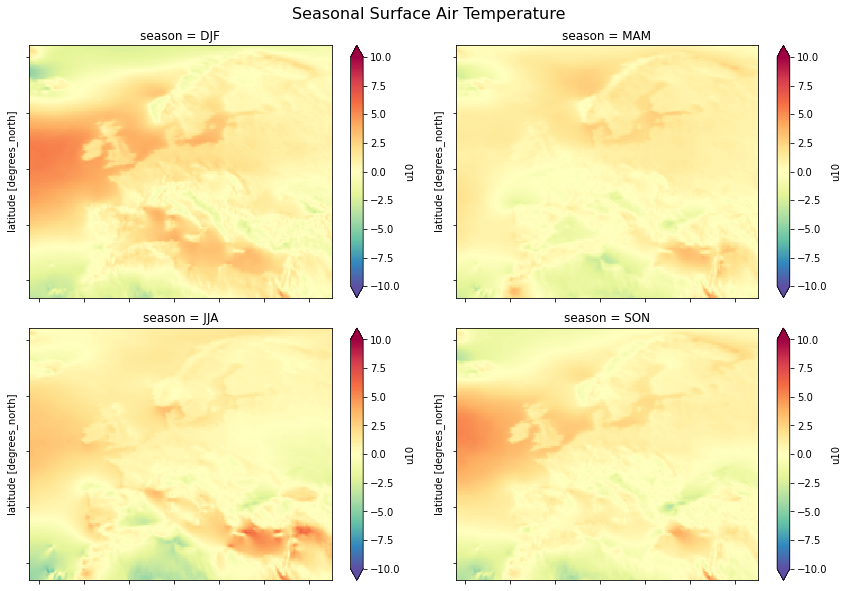

In [43]:
# Quick plot to show the results
notnull = pd.notnull(ds_weighted["u10"][0])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

ds_weighted["u10"].sel(season='DJF').where(notnull).plot.pcolormesh(
    ax=axes[0, 0],
    vmin=-10,
    vmax=10,
    cmap="Spectral_r",
    add_colorbar=True,
    extend="both",
)
ds_weighted["u10"].sel(season='MAM').where(notnull).plot.pcolormesh(
    ax=axes[0, 1],
    vmin=-10,
    vmax=10,
    cmap="Spectral_r",
    add_colorbar=True,
    extend="both",
)
ds_weighted["u10"].sel(season='JJA').where(notnull).plot.pcolormesh(
    ax=axes[1, 0],
    vmin=-10,
    vmax=10,
    cmap="Spectral_r",
    add_colorbar=True,
    extend="both",
)
ds_weighted["u10"].sel(season='SON').where(notnull).plot.pcolormesh(
    ax=axes[1, 1],
    vmin=-10,
    vmax=10,
    cmap="Spectral_r",
    add_colorbar=True,
    extend="both",
)

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

#axes[0, 0].set_title("Weighted by DPM")
#axes[0, 1].set_title("Equal Weighting")
#axes[0, 2].set_title("Difference")

plt.tight_layout()

fig.suptitle("Seasonal Surface Air Temperature", fontsize=16, y=1.02)

You can write the results to disc

In [45]:
# Use *.to_netcdf to the write a dataset to a netcdf file
ds_weighted.to_netcdf('weigthed_temperatures.nc')

<div class="alert alert-block alert-info">
<b>Reminder</b> 
<ul>
    <li>Import the package, aka <b>import xarray as xr</b>
    <li>Data is stored as DataArray and Dataset
    <li>Dataset is a multi-dimensional container of DataArray objects aligned along any number of shared dimensions, e.g. coordinates
    <li>You can do things by applying a method to a DataArray or Dataset
    </ul> 
</div>

<div class="alert alert-block alert-warning">
<b>Homework:</b> Check out the xarray <a href="https://docs.xarray.dev/en/stable/index.html">tutorial</a> and get familiar with the syntax.
</div>